# Predicting Laptop Prices Using Machine Learning

###### Common Libraries for Data Analysis and Visualization

In [4]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For general data visualization

# Ensures plots appear inline in Jupyter notebooks
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # Ignore warnings



In [5]:
data = pd.read_csv('laptop_data.csv')


In [6]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
data.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [8]:
# removing the unnamed: 0 col

data = data[['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
data.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [10]:
# checking for duplicated rows

data.duplicated().sum()

29

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [12]:
# Select categorical variables (object and category types)
categorical_vari = data.select_dtypes(include=['object', 'category']).columns

# Select numerical variables (all integer and float types)
numerical_vari = data.select_dtypes(include=['number']).columns

# Display the lists
categorical_vari, numerical_vari


(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

___1. Handle category Data Types:___

Adding 'categorical_vari' to select_dtypes ensures categorical variables stored as category type are also included.

___2. Simplified Numerical Type Selection:___

Using include=['number'] covers all numerical types (int, float, etc.) automatically, eliminating the need to explicitly specify int32, int64, float32, and float64.

___3. Readability:___

The code is cleaner and easier to read while being more comprehensive.

In [13]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {data[col].unique()}') #Print unique values of a specified column.

def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {data[col].value_counts()}') #Print value counts of a specified column.

for col in data.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 19

1. Functionality Separation:
Both functions (uniquevals and valuecounts) now take the DataFrame (df) and column name (col) as arguments, making them reusable for any DataFrame.

2. Error Handling:
Added try-except blocks to handle cases where a column might not exist in the DataFrame.

3. Output Formatting:
Improved formatting for better readability, including clear headers for each column and cleaner spacing.

4. Integration:
Both functions are used for every column in a loop, providing a comprehensive overview.

In [14]:
# Convert columns to string type (if they are not already) before using .str.replace()
data['Ram'] = data['Ram'].astype(str).str.replace('GB', '')  # Remove 'GB' from Ram column
data['Weight'] = data['Weight'].astype(str).str.replace('kg', '')  # Remove 'kg' from Weight column

# Convert the 'Ram' column to integer
data['Ram'] = data['Ram'].astype('int32')

# Convert the 'Weight' column to float
data['Weight'] = data['Weight'].astype('float32')

# Check the result
data.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# Exploratory Data Analysis

<Axes: xlabel='Price', ylabel='Density'>

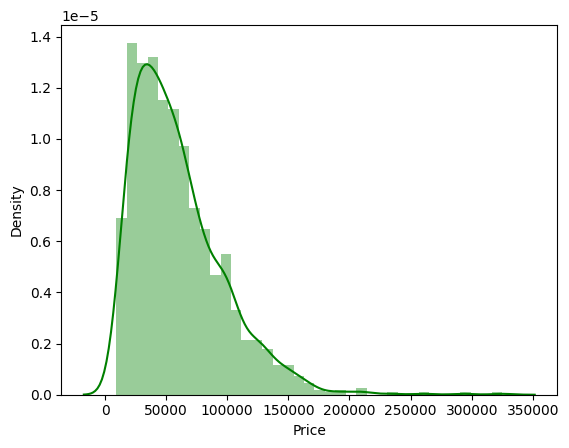

In [16]:
# viewing the distribution of the price column

sns.distplot(data['Price'],color='green')

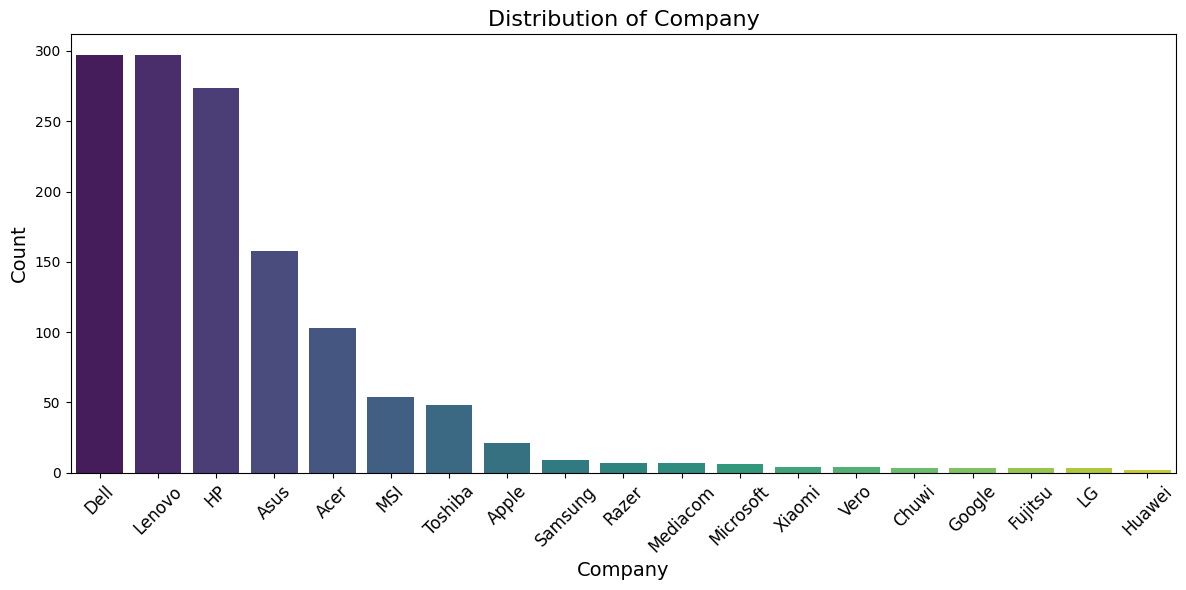

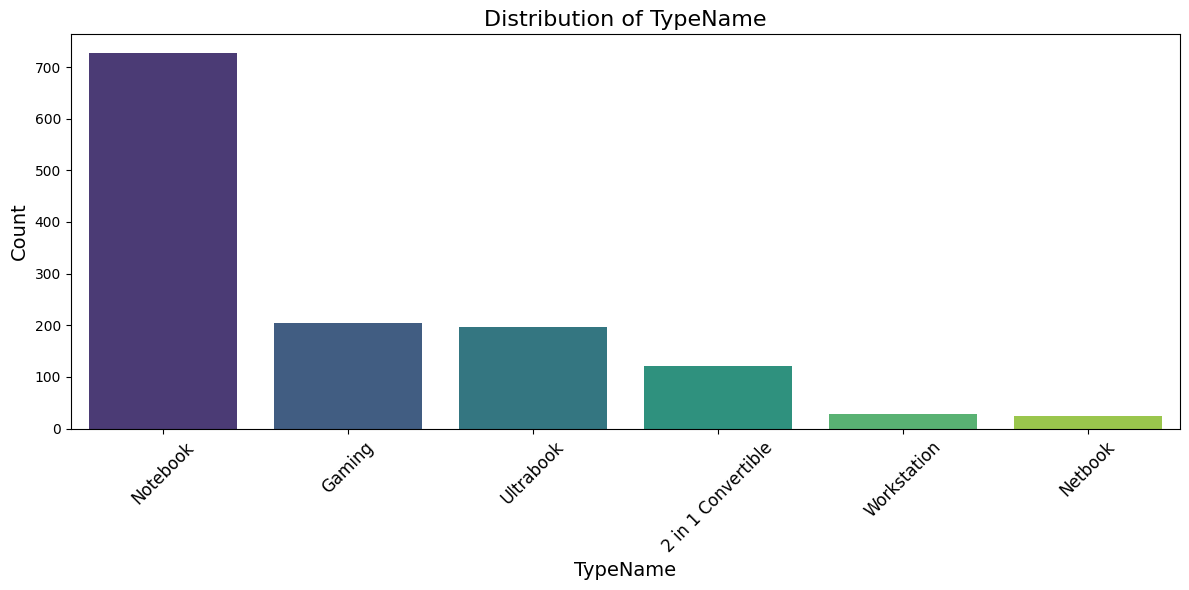

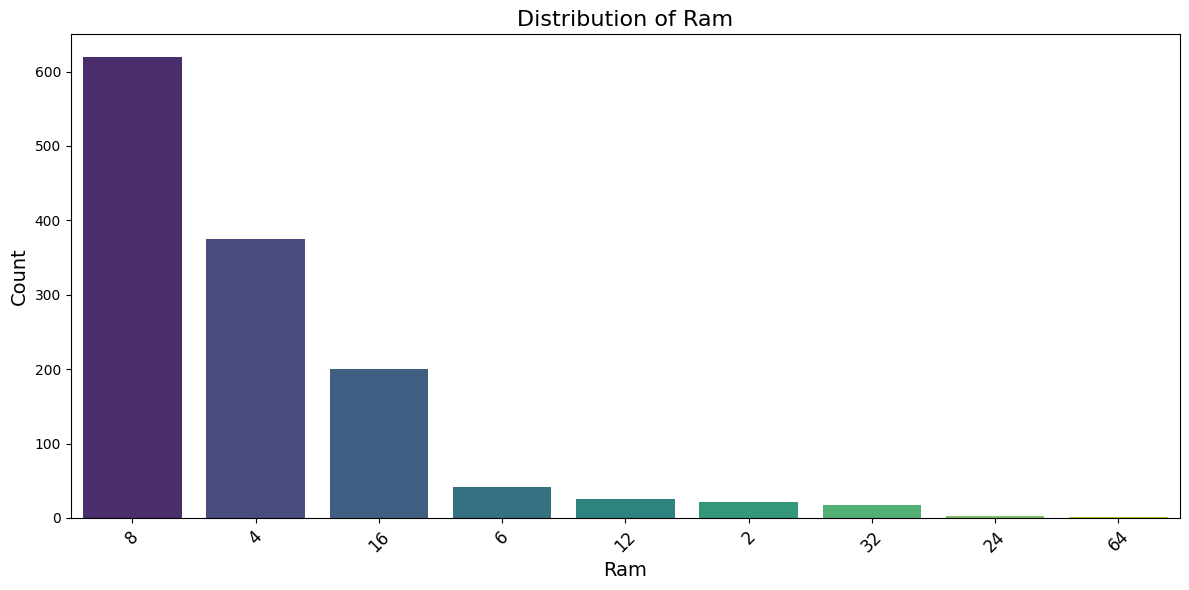

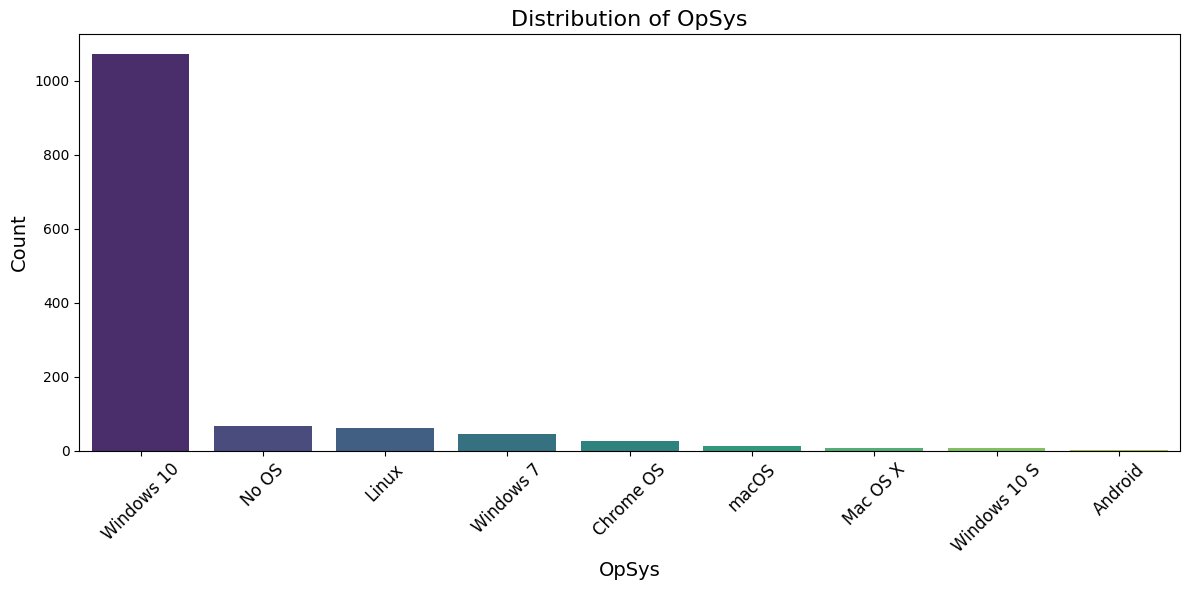

In [17]:
# Function to plot count plots for categorical variables
def drawplot(df, col):
    """Draws a countplot for the specified column in the DataFrame."""
    plt.figure(figsize=(12, 6))  # Adjust the figure size
    sns.countplot(x=data[col], palette='viridis', order=data[col].value_counts().index)  # Sort by frequency
    plt.title(f"Distribution of {col}", fontsize=16)  # Add a title
    plt.xlabel(col, fontsize=14)  # Label for the x-axis
    plt.ylabel("Count", fontsize=14)  # Label for the y-axis
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Columns to visualize
toview = ['Company', 'TypeName', 'Ram', 'OpSys']

# Generate plots for each column
for col in toview:
    drawplot(df=data, col=col)


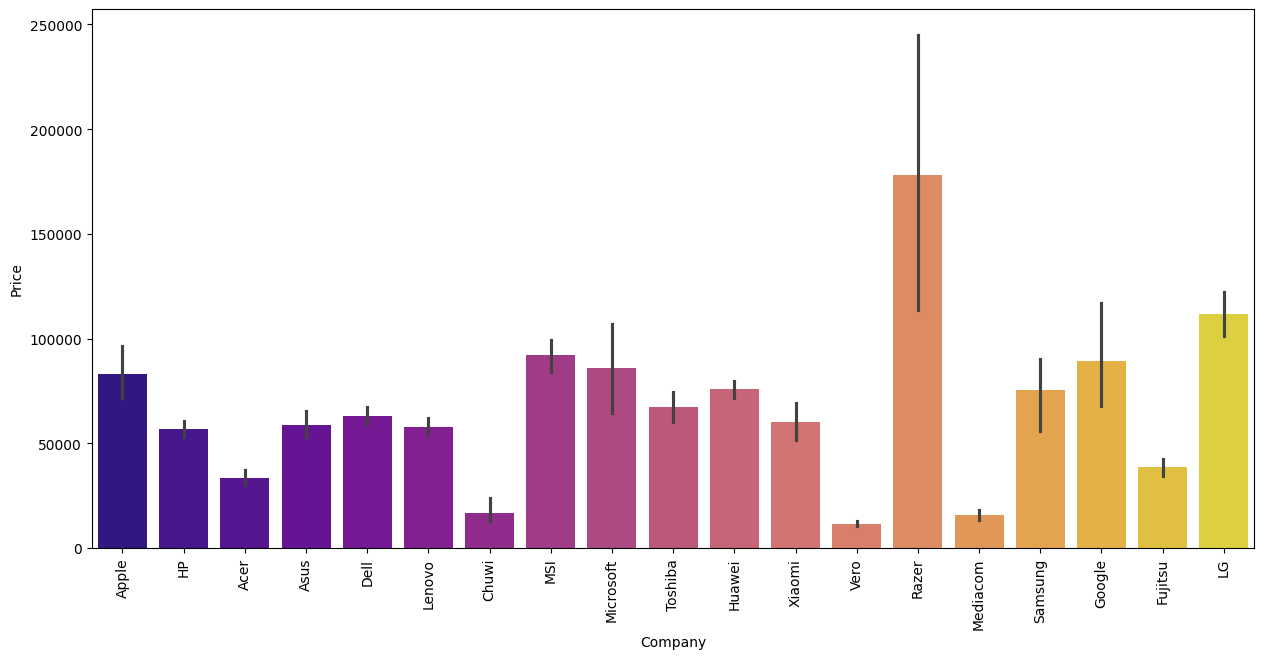

In [18]:
# average price for each of the laptop brands
# this will say us the insight that as per company the price of the laptop vary

plt.figure(figsize=(15,7))
sns.barplot(x=data['Company'], y=data['Price'], palette='plasma')
plt.xticks(rotation='vertical')
plt.show()


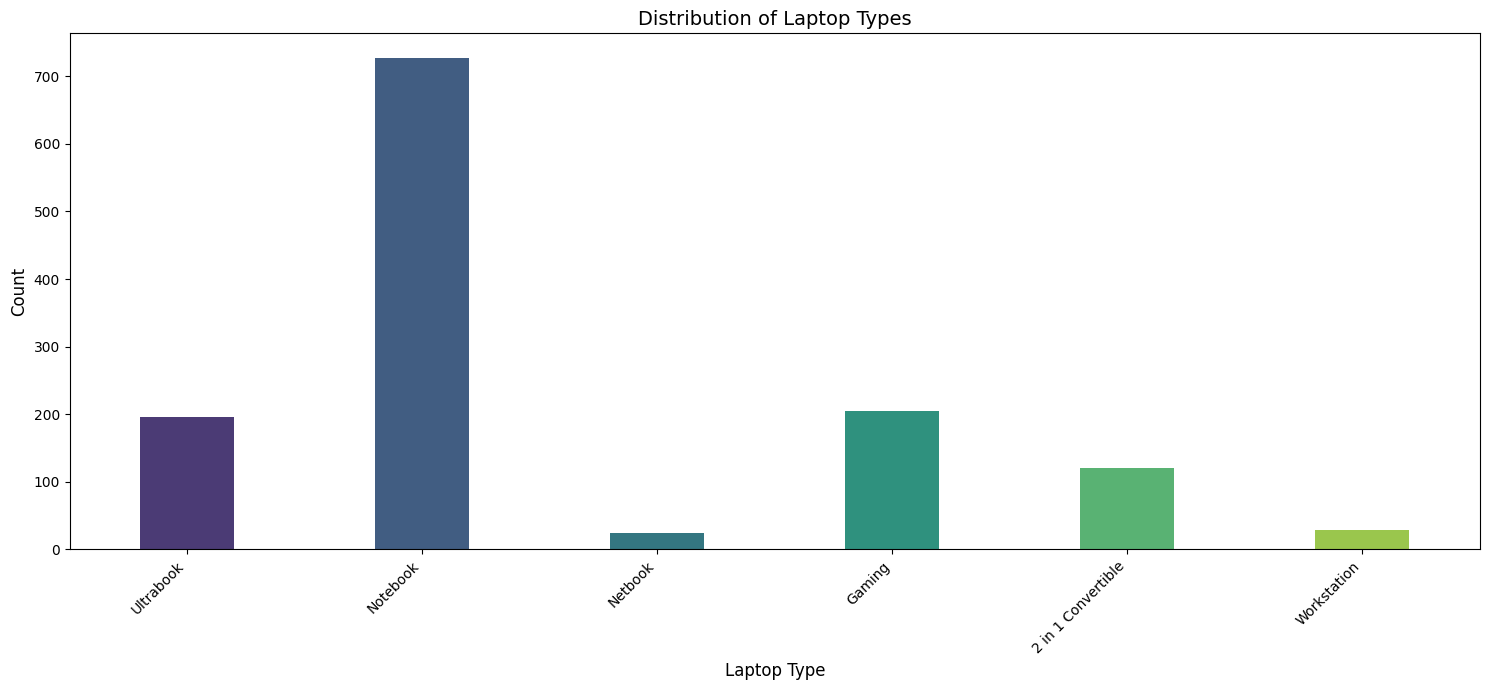

In [19]:
## various types of laptops

plt.figure(figsize=(15,7))  # Adjust figure size
sns.countplot(x='TypeName', data=data, palette='viridis', width=0.4)  # Vertical count plot
plt.title('Distribution of Laptop Types', fontsize=14)  # Add title
plt.xlabel('Laptop Type', fontsize=12)  # X-axis label
plt.ylabel('Count', fontsize=12)  # Y-axis label
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


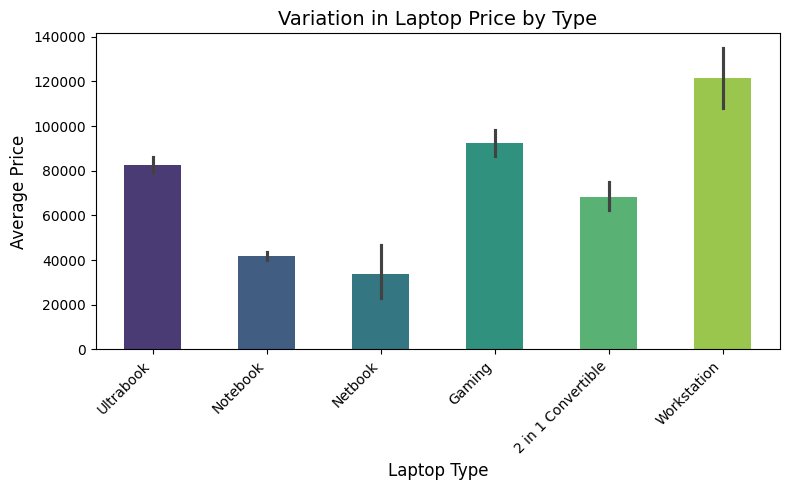

In [20]:
# laptop type and variation about the price

plt.figure(figsize=(8,5))  # Adjust the figure size to make it wider and more readable
sns.barplot(x='TypeName', y='Price', data=data, palette='viridis', width=0.5)  # Customize the bar width and color palette
plt.title('Variation in Laptop Price by Type', fontsize=14)  # Add a title to the chart
plt.xlabel('Laptop Type', fontsize=12)  # Label the x-axis
plt.ylabel('Average Price', fontsize=12)  # Label the y-axis
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap and ensure everything fits
plt.show()


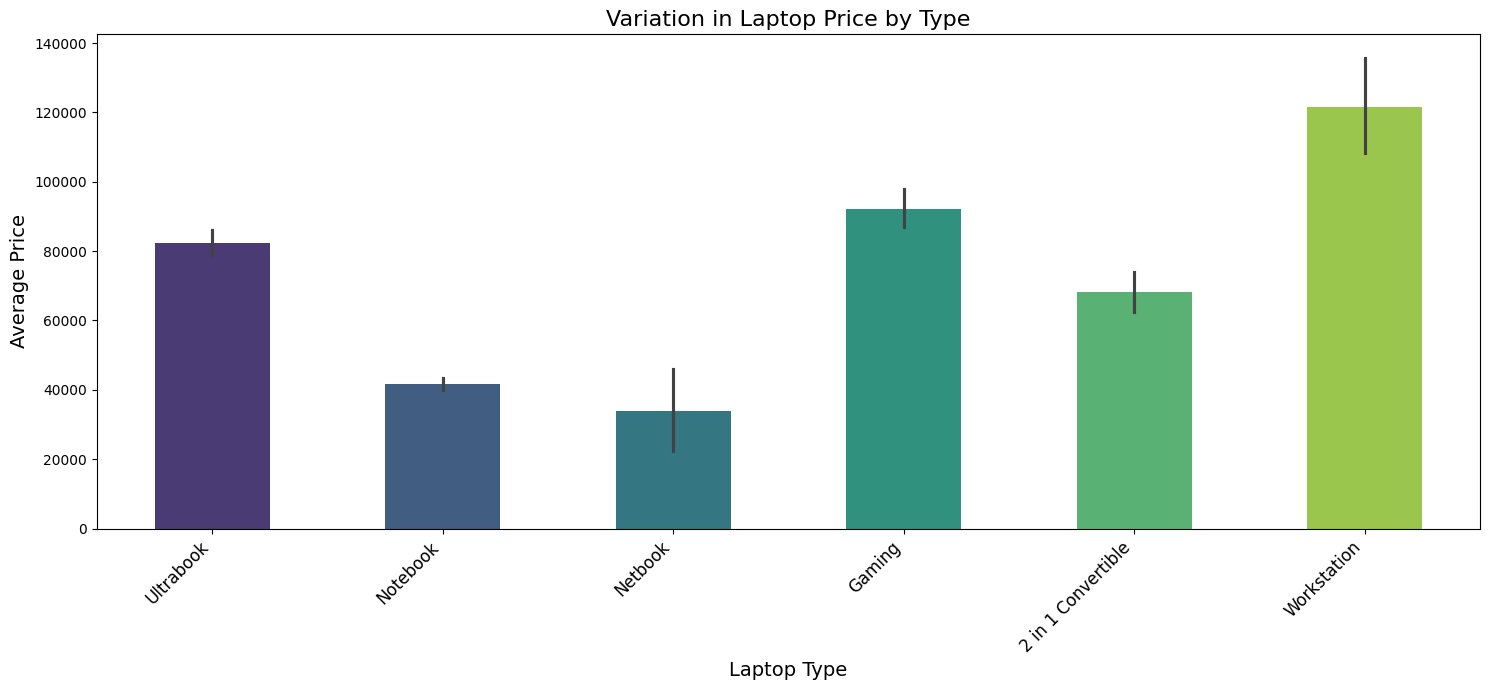

In [21]:
# variation of inches towards the price

plt.figure(figsize=(15,7))  # Adjust the figure size to make it wider and more readable
sns.barplot(x='TypeName', y='Price', data=data, palette='viridis', width=0.5)  # Customize the bar width and color palette
plt.title('Variation in Laptop Price by Type', fontsize=16)  # Add a title to the chart
plt.xlabel('Laptop Type', fontsize=14)  # Label the x-axis
plt.ylabel('Average Price', fontsize=14)  # Label the y-axis
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap and ensure everything fits
plt.show()


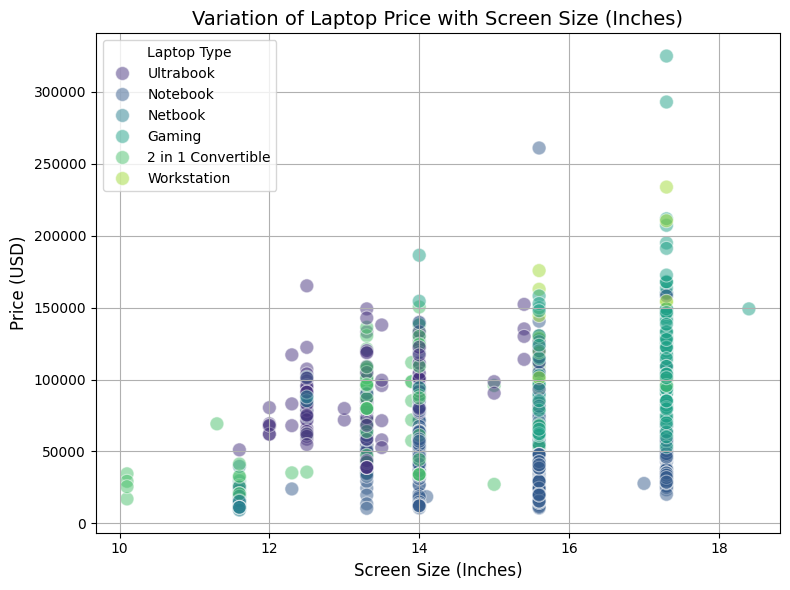

In [22]:
# variation of inches towards the price

plt.figure(figsize=(8,6))  # Adjust figure size for clarity
sns.scatterplot(x='Inches', y='Price', data=data, palette='viridis', s=100, alpha=0.5, hue='TypeName')  # Add color by TypeName, adjust point size and transparency
plt.title('Variation of Laptop Price with Screen Size (Inches)', fontsize=14)  # Add a title
plt.xlabel('Screen Size (Inches)', fontsize=12)  # X-axis label
plt.ylabel('Price (USD)', fontsize=12)  # Y-axis label
plt.grid(True)  # Add gridlines to make it easier to interpret values
plt.legend(title='Laptop Type', fontsize=10)  # Add legend for the color groups
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


___For the Screen Resolution column, there are multiple types of screen resolutions, such as Touch Screen, Normal, and IPS Panel. These categories can be used to group or classify the data based on the type of screen.___

In [23]:
data['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [24]:
# creating a new col,touchscreen if the value is 1 that laptop is touch screen

data['TouchScreen'] = data['ScreenResolution'].apply(lambda element:1
                                                      if 'Touchscreen' in element else 0)

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [25]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
521,HP,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,74538.7200,0
712,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Linux,1.98,38681.2800,0
1249,Dell,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8,256GB SSD,Intel HD Graphics 615,Windows 10,1.24,96596.6400,1
1223,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,91288.3536,1
237,Asus,Notebook,15.6,Full HD 1920x1080,AMD A10-Series A10-9620P 2.5GHz,4,128GB SSD + 1TB HDD,AMD Radeon R5 M430,Windows 10,2.20,30636.0000,0


TouchScreen
0    1111
1     192
Name: count, dtype: int64


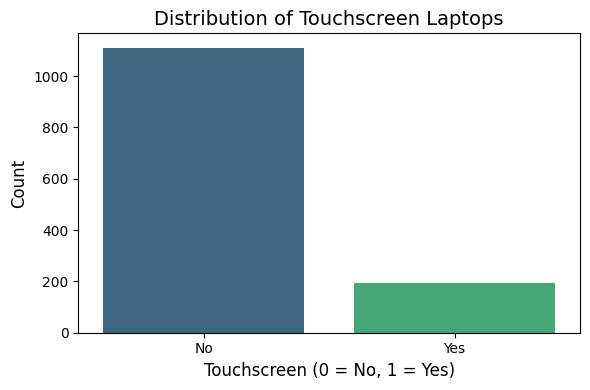

In [26]:
# Verify the unique values in the TouchScreen column
print(data['TouchScreen'].value_counts())

# Plotting the TouchScreen distribution
plt.figure(figsize=(6,4))  # Adjust the figure size
sns.countplot(x='TouchScreen', data=data, palette='viridis')  # Use the correct dataset reference
plt.title('Distribution of Touchscreen Laptops', fontsize=14)  # Add a title
plt.xlabel('Touchscreen (0 = No, 1 = Yes)', fontsize=12)  # Label the x-axis
plt.ylabel('Count', fontsize=12)  # Label the y-axis
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=10)  # Ensure correct tick labels
plt.tight_layout()  # Adjust the layout
plt.show()


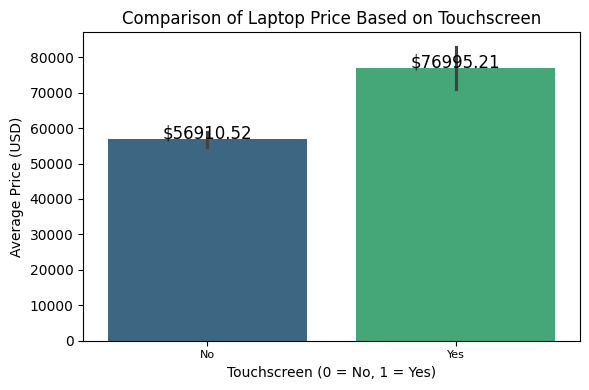

In [27]:
# Plotting the comparison of touchscreen vs price
plt.figure(figsize=(6,4))  # Adjust figure size
sns.barplot(x='TouchScreen', y='Price', data=data, palette='viridis')  # Use a color palette
plt.title('Comparison of Laptop Price Based on Touchscreen', fontsize=12)  # Add a title
plt.xlabel('Touchscreen (0 = No, 1 = Yes)', fontsize=10)  # Label the x-axis
plt.ylabel('Average Price (USD)', fontsize=10)  # Label the y-axis
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=8)  # Replace 0 and 1 with descriptive labels

# Annotate bars with their heights (average price)
for bar in plt.gca().patches:
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
        bar.get_height() + 100,  # Y-coordinate (just above the bar)
        f'${bar.get_height():.2f}',  # Text to display (formatted price)
        ha='center', fontsize=12, color='black'
    )

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [28]:
# creating a new col,touchscreen if the value is 1 that laptop is touch screen

data['IPS'] = data['ScreenResolution'].apply(lambda element:1
                                                      if 'IPS' in element else 0)

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


IPS
0    938
1    365
Name: count, dtype: int64


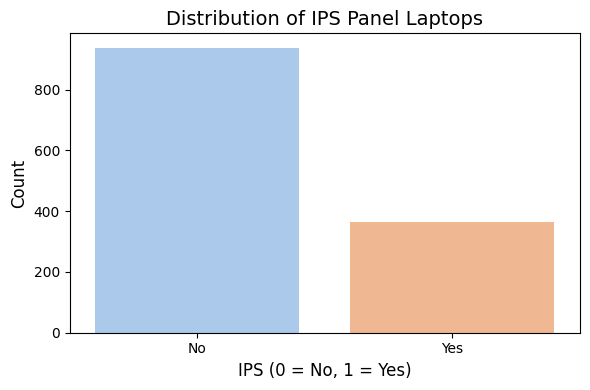

In [29]:
# Verify the unique values in the IPS column
print(data['IPS'].value_counts())

# Plotting the IPS Panel distribution
plt.figure(figsize=(6,4))  # Adjust the figure size
sns.countplot(x='IPS', data=data, palette='pastel')  # Use the correct dataset reference
plt.title('Distribution of IPS Panel Laptops', fontsize=14)  # Add a title
plt.xlabel('IPS (0 = No, 1 = Yes)', fontsize=12)  # Label the x-axis
plt.ylabel('Count', fontsize=12)  # Label the y-axis
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=10)  # Ensure correct tick labels
plt.tight_layout()  # Adjust the layout
plt.show()


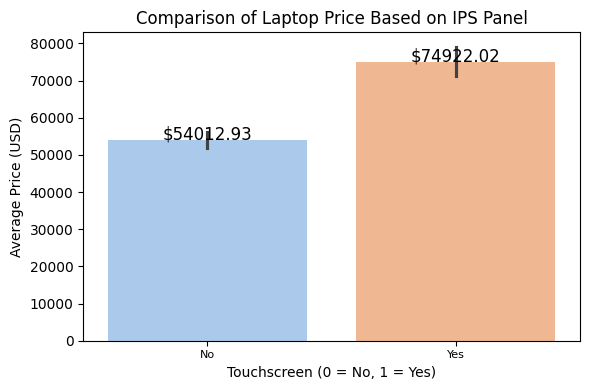

In [30]:
# price variation with respect to the IPS col

# Plotting the comparison of IPS vs price
plt.figure(figsize=(6,4))  # Adjust figure size
sns.barplot(x='IPS', y='Price', data=data, palette='pastel')  # Use a color palette
plt.title('Comparison of Laptop Price Based on IPS Panel', fontsize=12)  # Add a title
plt.xlabel('Touchscreen (0 = No, 1 = Yes)', fontsize=10)  # Label the x-axis
plt.ylabel('Average Price (USD)', fontsize=10)  # Label the y-axis
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=8)  # Replace 0 and 1 with descriptive labels

# Annotate bars with their heights (average price)
for bar in plt.gca().patches:
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
        bar.get_height() + 100,  # Y-coordinate (just above the bar)
        f'${bar.get_height():.2f}',  # Text to display (formatted price)
        ha='center', fontsize=12, color='black'
    )

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### Extracting the X Resolution and the Y Resolution

In [31]:
# we will split the text at the "x" letter and seperate the 2 parts
# from this we can observe that one of the col is Y res we need to do
# some feature engineering on the X res col

splitdata= data['ScreenResolution'].str.split('x',n = 1,expand=True)
splitdata.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [32]:
splitdata = data['ScreenResolution'].str.split('x',n = 1,expand=True)

data['X_res'] = splitdata[0]
data['Y_res'] = splitdata[1]
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [33]:
'''
So basically from that whole text of the X_res col,we need to
extract the digits from it,but the problem is the numbers are scattered
in some cases,that is the reason why i am using regex,if we use this
we will exactly get the numbers which we are looking for!,
so firstly replace all the "," with "" and then find all numbers
from that string as "\d+\.?\d+",\d means that integer number and \.?
all the numbers which come after an number and \d+ the string must end with number


'''


data['X_res'] = data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [34]:
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


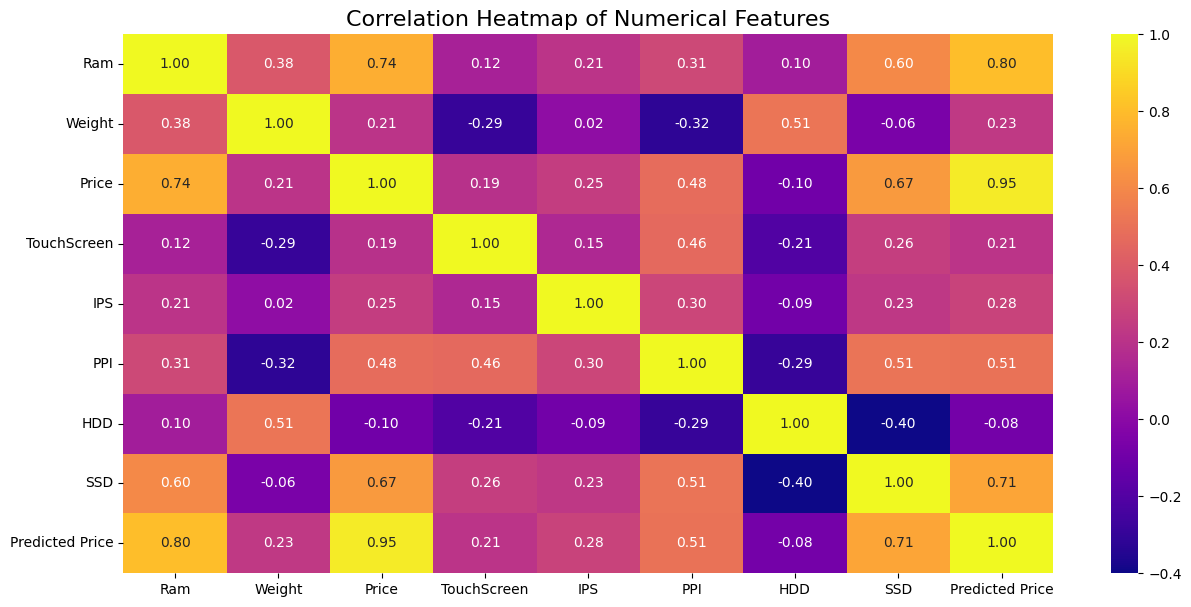

In [173]:
# Filter numerical columns
numerical_data = data.select_dtypes(include=['int64', 'int32', 'float64', 'float32'])

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(15,7))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()


In [36]:
# Filter only numeric columns
numerical_data = data.select_dtypes(include=['int64', 'int32', 'float64', 'float32'])

# Compute correlations
price_correlation = numerical_data.corr()['Price']

# Display the correlation values
print(price_correlation)


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64


From the correlation plot, it is evident that as X_res and Y_res increase, the price of the laptop also tends to rise. This indicates a positive correlation, suggesting that higher screen resolution contributes significantly to the pricing of laptops. To leverage this valuable information, the Resolution column was split into X_res and Y_res for a more granular analysis and better feature representation.

To enhance the analysis, we can create a new column called PPI (Pixels Per Inch). From the correlation plot, we observed significant collinearity between X_res and Y_res. To address this and extract meaningful insights, we can combine these features with Inches, which exhibits lower collinearity. By integrating these variables, we calculate PPI using the following formula:

$$
    PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

In [37]:
data['PPI'] = (((data['X_res']**2+data['Y_res']**2))**0.5/data['Inches']).astype('float')
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [38]:
# Ensure PPI calculation is added to the dataset
data['PPI'] = (((data['X_res']**2 + data['Y_res']**2))**0.5 / data['Inches']).astype('float')

# Filter numeric columns only
numeric_data = data.select_dtypes(include=['int64', 'int32', 'float64', 'float32'])

# Calculate correlations
correlation_with_price = numeric_data.corr()['Price']

# Display correlation values
print(correlation_with_price)


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64


Based on the correlation analysis, we observe that PPI has a strong correlation with the Price. Since PPI effectively combines information from three features—Inches, X_res, and Y_res—into a single metric, it provides a comprehensive representation of these attributes. Therefore, to simplify the dataset and avoid redundancy, we will retain PPI and drop the individual columns Inches, X_res, and Y_res.

In [39]:
data.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


Next, we will focus on the CPU column, which contains a significant amount of textual data. Processing this efficiently is crucial, as it may provide valuable insights and contribute to better feature engineering for our analysis.

In [40]:
data['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


Most processors in the dataset are manufactured by Intel. To streamline the analysis, we will categorize Intel processors into three main groups: i5, i7, and Other. The Other category will include Intel processors that do not belong to the i3, i5, or i7 families. Additionally, we will create a separate category for AMD processors, as they represent a distinct group.

To achieve this, we need to extract the first three words from each entry in the CPU column, as they indicate the specific processor type. This extracted information will be used to classify the CPUs into the defined categories. Here's how we will proceed:

In [41]:
data['CPU_name'] = data['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
data.head()


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [42]:
'''
As mentioned earlier,if we get any of the intel `i3,i5 or i7` versions
we will return them as it is,but if we get any other processor
we will first check whether is that a variant of the intel? or not
if yes,then we will tag it as "Other Intel Processor" else we will
say it as `AMD Processor`

'''

def processortype(text):

    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text

    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'

        else:
            return 'AMD Processor'



data['CPU_name'] = data['CPU_name'].apply(lambda text:processortype(text))
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

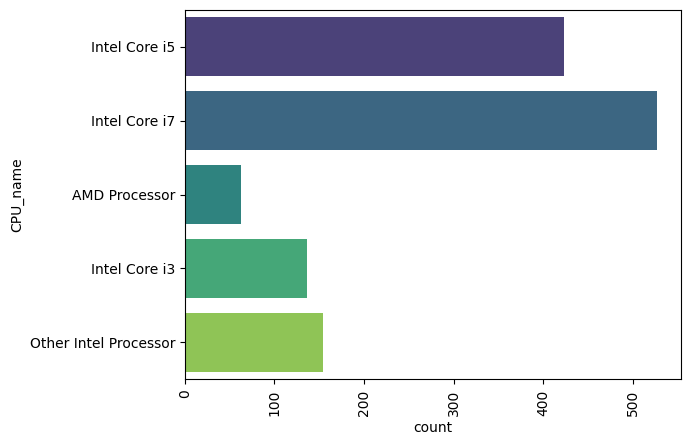

In [47]:
sns.countplot(data['CPU_name'],palette='viridis')
plt.xticks(rotation = 'vertical')

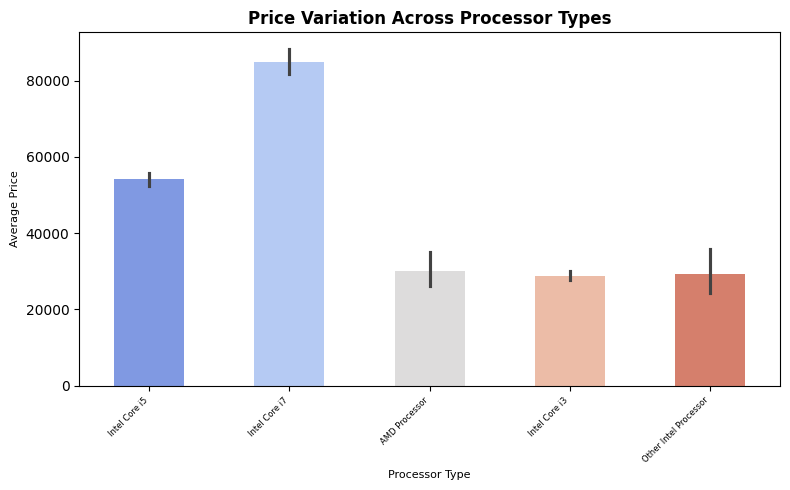

In [51]:
# Price vs Processor Variation
plt.figure(figsize=(8, 5))
sns.barplot(x='CPU_name', y='Price', data=data, palette='coolwarm', width= 0.5)
plt.title('Price Variation Across Processor Types', fontsize=12, fontweight='bold')
plt.xlabel('Processor Type', fontsize=8)
plt.ylabel('Average Price', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.tight_layout()
plt.show()


In [53]:
## dropping the cpu column

data.drop(columns=['Cpu'],inplace=True)
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


##### Analysis on the RAM column

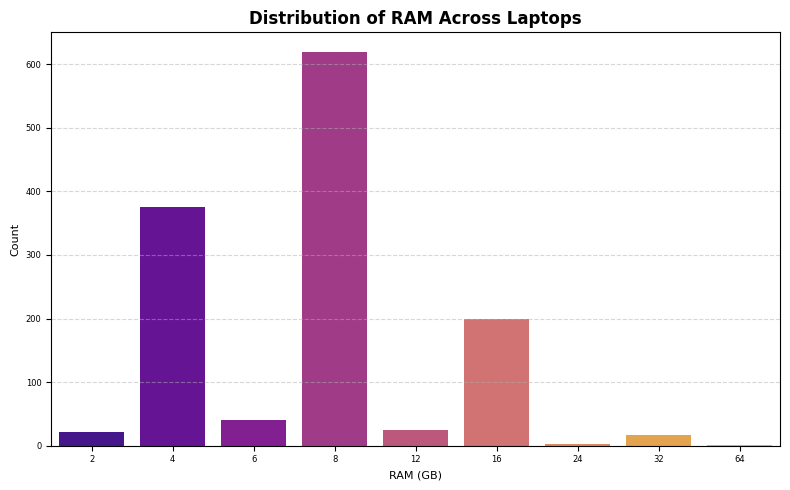

In [57]:
# Distribution of RAM in Laptops
plt.figure(figsize=(8, 5))
sns.countplot(x='Ram', data=data, palette='plasma')
plt.title('Distribution of RAM Across Laptops', fontsize=12, fontweight='bold')
plt.xlabel('RAM (GB)', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


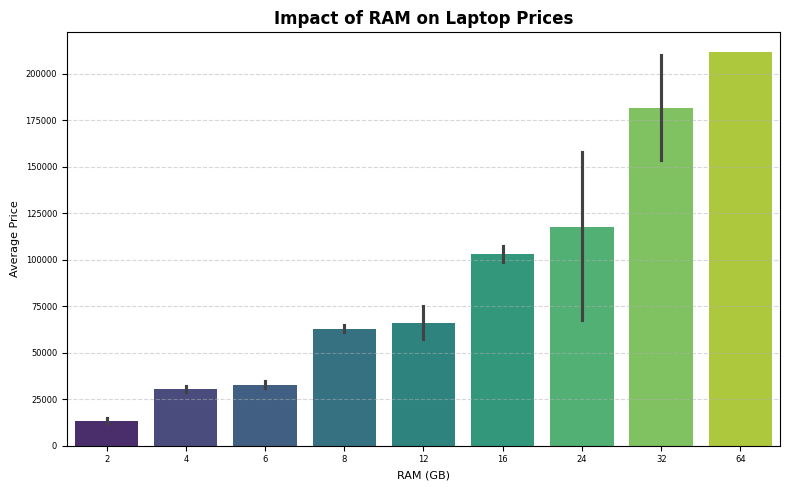

In [60]:
# Relationship Between RAM and Price
plt.figure(figsize=(8, 5))
sns.barplot(x='Ram', y='Price', data=data, palette='viridis')
plt.title('Impact of RAM on Laptop Prices', fontsize=12, fontweight='bold')
plt.xlabel('RAM (GB)', fontsize=8)
plt.ylabel('Average Price', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


We will separate the Type of memory and its corresponding values, similar to the approach used earlier.

This process involves multiple steps since the memory data is represented in mixed formats, such as 128GB SSD + 1TB HDD. To standardize and bring all memory values into a uniform dimension, we need to perform specific transformations, which are detailed below.

In [61]:
data['Memory'].iloc[:1][0]

'128GB SSD'

In [62]:
# we have different categories and also different kinds of variations

data['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [63]:
## 4 most common variants observed : HHD,SSD,Flash,Hybrid

# this expression will remove the decimal space for example 1.0 TB will be 1TB

data['Memory'] = data['Memory'].astype(str).replace('\.0','',regex = True)

# replace the GB word with " "

data['Memory'] = data['Memory'].str.replace('GB','')

# replace the TB word with "000"

data['Memory'] = data['Memory'].str.replace('TB','000')

# split the word accross the "+" character

newdf = data['Memory'].str.split("+",n = 1,expand = True)

newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [65]:
# we will strip up all the white spaces,basically eliminating white space

data['first'] = newdf[0]
data['first'] = data['first'].str.strip()
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [67]:
def applychanges(value):

    data['Layer1'+value] = data['first'].apply(lambda x:1 if value in x else 0)


listtoapply = ['HDD','SSD','Hybrid','FlashStorage']
for value in listtoapply:
    applychanges(value)


data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [68]:
# remove all the characters just keep the numbers

data['first'] = data['first'].str.replace(r'\D','')
data['first'].value_counts()

,count
first,
256 SSD,500
1000 HDD,225
128 SSD,172
512 SSD,138
500 HDD,132
32 Flash Storage,38
64 Flash Storage,16
2000 HDD,16
1000 SSD,16


In [69]:
data['Second'] = newdf[1]
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0,None


In [70]:
def applychanges1(value):

    data['Layer2'+value] = data['Second'].apply(lambda x:1 if value in x else 0)


listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
data['Second'] = data['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)


# remove all the characters just keep the numbers

data['Second'] = data['Second'].str.replace(r'\D','')
data['Second'].value_counts()

,count
Second,
0,1095
1000 HDD,185
2000 HDD,15
256 SSD,3
500 HDD,2
1000 Hybrid,2
512 SSD,1


In [73]:
# Extract numeric parts from 'first' and 'Second' columns
data['first'] = data['first'].str.extract('(\d+)').astype('int')
data['Second'] = data['Second'].str.extract('(\d+)').astype('int')

data.head()


,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [74]:
# multiplying the elements and storing the result in subsequent columns


data["HDD"]=(data["first"]*data["Layer1HDD"]+data["Second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["Second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["Second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1FlashStorage"]+data["Second"]*data["Layer2FlashStorage"])


## dropping of uncessary columns

data.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [75]:
data.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
770,Dell,Notebook,16,256 SSD,AMD Radeon R7 M445,Windows 10,2.30,62938.0656,0,0,141.211998,Intel Core i7,0,256,0,0
1181,Lenovo,Ultrabook,6,256 SSD,Nvidia GeForce 920M,Windows 10,1.54,44275.6800,0,0,141.211998,Intel Core i7,0,256,0,0
576,Toshiba,Ultrabook,16,512 SSD,Intel HD Graphics 620,Windows 10,1.24,99367.2000,1,0,157.350512,Intel Core i7,0,512,0,0
220,Dell,Notebook,8,256 SSD,AMD Radeon 520,Linux,2.20,36089.2080,0,0,141.211998,Intel Core i5,0,256,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,0


In [76]:
data.drop(columns=['Memory'],inplace=True)
data.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
1152,Lenovo,Notebook,8,AMD Radeon R5 M330,No OS,2.32,31914.7200,0,0,141.211998,Intel Core i5,1000,0,0,0
1155,HP,Notebook,4,AMD Radeon 520,Windows 10,1.91,25515.2592,0,0,141.211998,AMD Processor,0,256,0,0
903,Lenovo,Ultrabook,8,Intel HD Graphics 620,Windows 10,1.13,109170.7200,0,1,157.350512,Intel Core i7,0,0,0,0
1053,HP,Notebook,4,Intel HD Graphics 620,Windows 10,2.04,52161.1200,0,0,100.454670,Intel Core i5,0,256,0,0
138,Lenovo,Notebook,4,Nvidia GeForce 920MX,No OS,2.20,26586.7200,0,0,141.211998,Intel Core i5,1000,0,0,0


In [83]:
# Filter only numeric columns
numerical_data = data.select_dtypes(include=['int64', 'int32', 'float64', 'float32'])

# Compute correlations
price_correlation = numerical_data.corr()['Price']

# Display the correlation values
print(price_correlation)


Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage         NaN
Name: Price, dtype: float64


Based on the correlation analysis, we observe that Hybrid and Flash Storage have minimal impact on the price and can be safely dropped. In contrast, HDD and SSD show significant correlation with price. Notably, HDD exhibits a negative correlation with price, which aligns with the trend that higher-priced laptops are more likely to use SSDs instead of HDDs. Conversely, laptops with lower prices are more likely to rely on HDD storage.

In [84]:
data.columns


Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS', 'PPI', 'CPU_name', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [85]:
data.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


#### Analysis on GPU

In [86]:
data['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


Given the limited data available about the laptops, it’s more effective to concentrate on the GPU brands rather than the specific values accompanying them. By focusing on the brands, we can extract meaningful insights without being overwhelmed by less significant details.








In [87]:
# this is what we will be doing,extracting the brands
a = data['Gpu'].iloc[1]
print(a.split()[0])

Intel


<Axes: xlabel='count', ylabel='Gpu brand'>

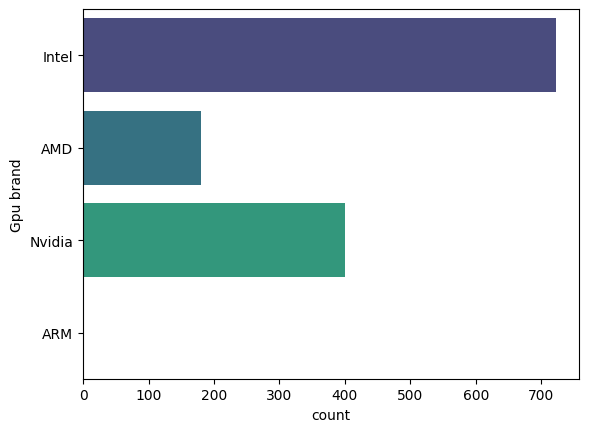

In [89]:
data['Gpu brand'] = data['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(data['Gpu brand'],palette='viridis')

<Axes: xlabel='count', ylabel='Gpu brand'>

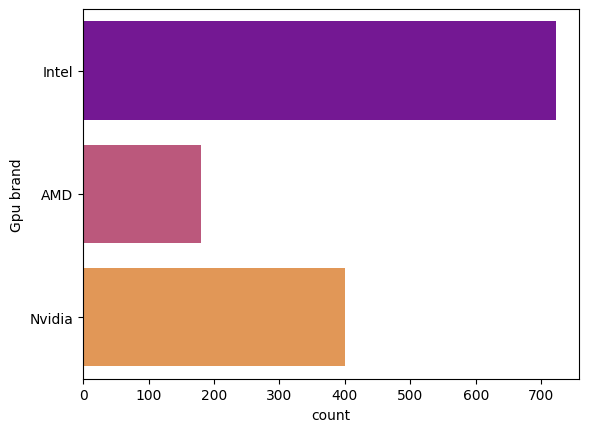

In [90]:
# removing the "ARM" tuple

data = data[data['Gpu brand']!='ARM']
sns.countplot(data['Gpu brand'],palette='plasma')

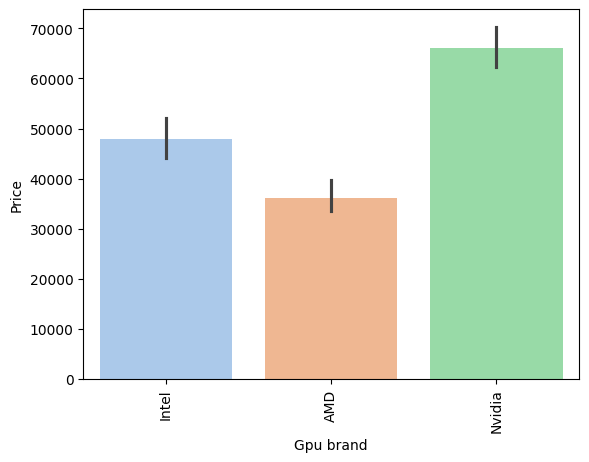

In [93]:
# Corrected code for GPU brand vs. Price analysis
sns.barplot(x='Gpu brand', y='Price', data=data, estimator=np.median, palette='pastel')
plt.xticks(rotation='vertical')
plt.show()


In [95]:
data = data.drop(columns=['Gpu'])
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


#### Operating System analysis

In [96]:
data['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


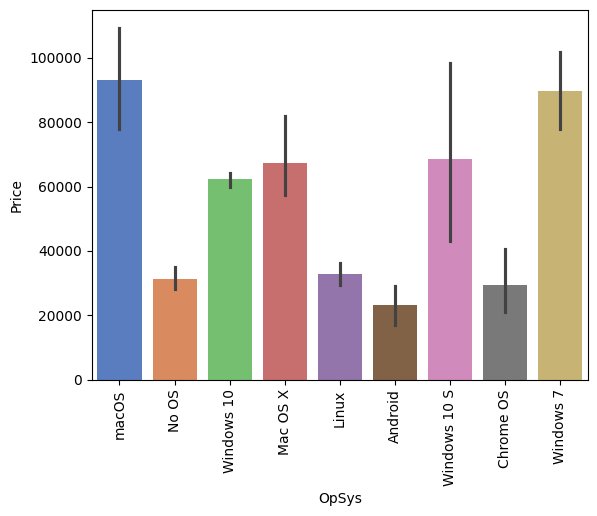

In [100]:
# Corrected code for Operating System vs. Price analysis
sns.barplot(x='OpSys', y='Price', data=data, palette='muted')
plt.xticks(rotation='vertical')
plt.show()


In [101]:
data['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [102]:
# club {Windows 10,Windows 7,Windows 7 S}-->Windows
# club {macOS,mac OS X}--> mac
# else return Others

def setcategory(text):

    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'

    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'

    else:
        return 'Other'


data['OpSys'] = data['OpSys'].apply(lambda x:setcategory(x))

data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [103]:
data.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
106,Lenovo,Notebook,4,Windows,1.85,22105.8720,0,0,141.211998,Intel Core i3,1000,0,Intel
1106,MSI,Gaming,8,Windows,2.90,80516.2032,0,0,127.335675,Intel Core i7,1000,128,Nvidia
922,HP,Ultrabook,8,Windows,1.39,61218.7200,1,0,276.053530,Intel Core i7,0,256,Intel
373,Lenovo,Notebook,4,Windows,2.60,26053.9200,0,0,106.113062,AMD Processor,0,128,AMD
1284,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel


<Axes: xlabel='count', ylabel='OpSys'>

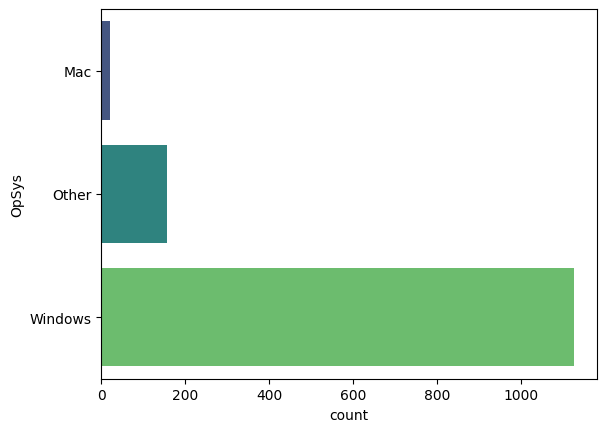

In [105]:
sns.countplot(data['OpSys'],palette='viridis')

([0, 1, 2], [Text(0, 0, 'Mac'), Text(1, 0, 'Other'), Text(2, 0, 'Windows')])

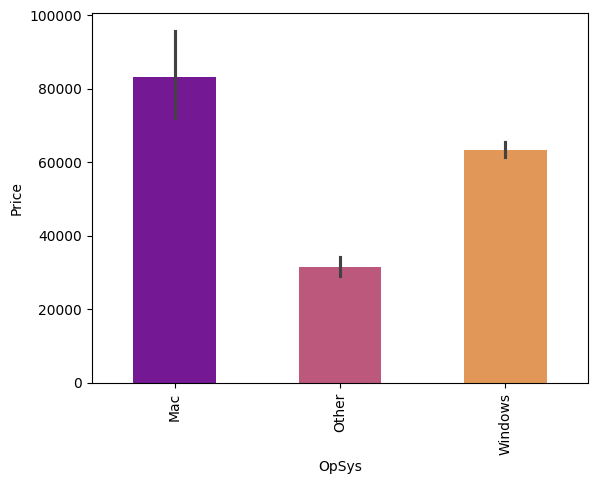

In [108]:
sns.barplot(x = data['OpSys'],y = data['Price'], palette='plasma', width= 0.5)
plt.xticks(rotation = 'vertical')

##### Weight analysis

<Axes: xlabel='Weight', ylabel='Density'>

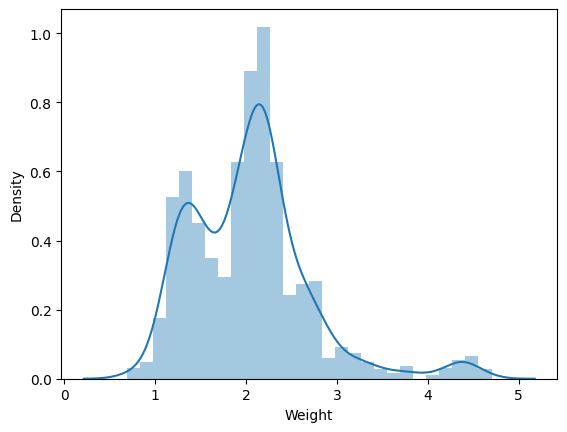

In [112]:
sns.distplot(data['Weight'])

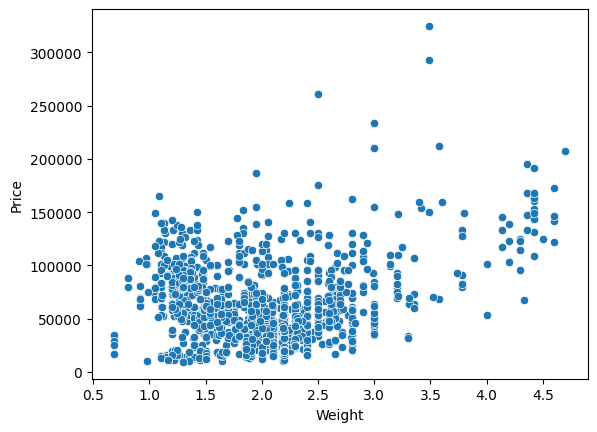

In [114]:
# Corrected code for Weight vs Price scatter plot
sns.scatterplot(x='Weight', y='Price', data=data)
plt.show()


#### Price Analysis

<Axes: xlabel='Price', ylabel='Density'>

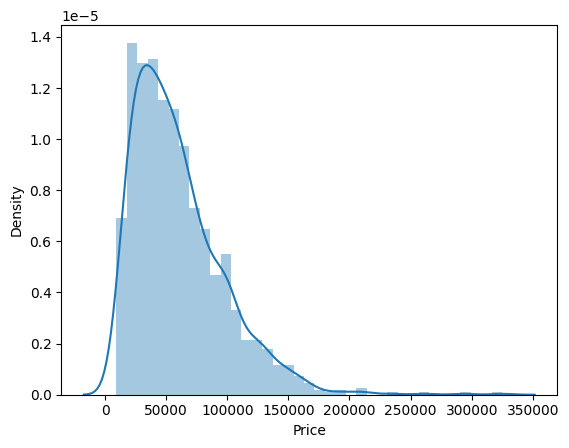

In [115]:
sns.distplot(data['Price'])

<Axes: xlabel='Price', ylabel='Density'>

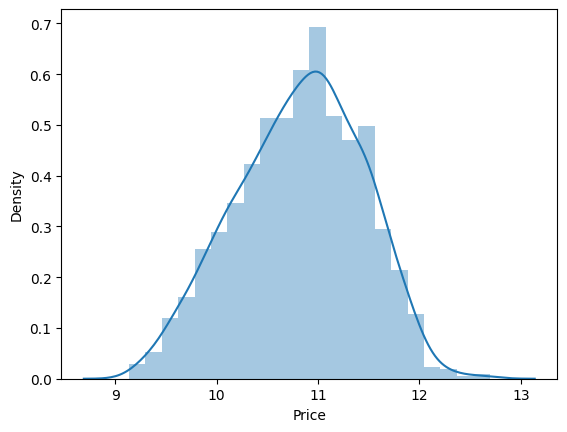

In [117]:
# so if we apply np.log to the Price col we get a gaussian distibution

sns.distplot(np.log(data['Price']))

In [120]:
# Filter only numeric columns
numerical_data = data.select_dtypes(include=['int64', 'int32', 'float64', 'float32'])

# Compute correlations
price_correlation = numerical_data.corr()['Price']

# Display the correlation values
print(price_correlation)


Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64


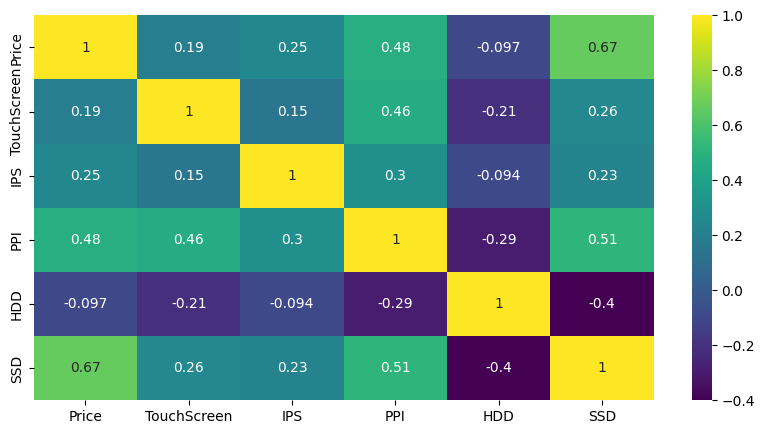

In [123]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis')
plt.show()


## Model Building

In [124]:
test = np.log(data['Price'])
train = data.drop(['Price'],axis = 1)


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [126]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1106, 12), (196, 12))

We have imported a class called ColumnTransformer, which is widely used in model building through Pipelines. To effectively use it, we need to identify the index positions of the columns containing categorical variables.

In [127]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand'}

### Linear Regression

In [129]:
# Apply one hot encoding on specified columns and pass through others
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 3, 8, 11])
], remainder='passthrough')

step2 = LinearRegression()

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the model
pipe.fit(X_train, y_train)

# Predict on the test set
y_pred = pipe.predict(X_test)

# Evaluate the model performance
print('R2 score', metrics.r2_score(y_test, y_pred))
print('MAE', metrics.mean_absolute_error(y_test, y_pred))

R2 score 0.8073277448418614
MAE 0.21017827976428774


The Mean Absolute Error (MAE) of the model is 0.21, which indicates that the model's predictions are off by ±0.21 from the actual values on average. To understand how this error translates in terms of a percentage change in the predicted price, we can calculate the exponential of the error, as shown below:

In [130]:
np.exp(0.21)


1.2336780599567432

This will give us a factor by which the predicted price might differ, considering the MAE. If we're comparing the model's performance or assessing the variability of predictions, this approach provides an intuitive way to express the model's deviation in terms of growth or reduction (multiplicative factor).

### Ridge Regression

We will apply One-Hot Encoding to the columns at indices [0, 1, 3, 8, 11] to convert categorical variables into numerical format. For all other columns, we will keep them unchanged by setting the remainder parameter to 'passthrough'.

In [133]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Step 1: Apply OneHotEncoder to specific columns and leave other columns unchanged
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 3, 8, 11])  # sparse=False -> sparse_output=False
    ],
    remainder='passthrough'  # Leave other columns as they are
)

# Step 2: Apply Ridge regression with a regularization parameter
step2 = Ridge(alpha=10)

# Create the pipeline with two steps: ColumnTransformer and Ridge regression
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model's performance
print('R2 score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))


R2 score: 0.8127331031311809
MAE: 0.20926802242582968


### LassoRegression

In [136]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Step 1: Apply OneHotEncoder to the specified columns and leave other columns unchanged
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 3, 8, 11])
    ],
    remainder='passthrough'  # Leave other columns unchanged
)

# Step 2: Apply Lasso regression with a regularization parameter
step2 = Lasso(alpha=0.001)

# Step 3: Create a pipeline with the ColumnTransformer and Lasso regression
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Step 4: Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = pipe.predict(X_test)

# Step 6: Evaluate the model's performance
print('R2 score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))


R2 score: 0.8071857196899417
MAE: 0.2111435071691317


### Decision Tree

In [138]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Step 1: Apply OneHotEncoder to the specified columns and leave other columns unchanged
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 3, 8, 11])
    ],
    remainder='passthrough'  # Leave other columns unchanged
)

# Step 2: Apply DecisionTreeRegressor with a maximum depth of 8
step2 = DecisionTreeRegressor(max_depth=8)

# Step 3: Create the pipeline with the ColumnTransformer and DecisionTreeRegressor
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Step 4: Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = pipe.predict(X_test)

# Step 6: Evaluate the model's performance
print('R2 score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))


R2 score: 0.8373170829834776
MAE: 0.1842817113896883


### Random Forest

In [139]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Step 1: Apply OneHotEncoder to specified columns (index [0, 1, 3, 8, 11])
# and leave other columns unchanged using 'passthrough'
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 3, 8, 11])
    ],
    remainder='passthrough'  # Pass through other columns without modification
)

# Step 2: Initialize RandomForestRegressor with hyperparameters for better performance
step2 = RandomForestRegressor(
    n_estimators=100,      # Number of trees in the forest
    random_state=3,        # For reproducibility
    max_samples=0.5,       # Use 50% of the data for each tree (bootstrap sampling)
    max_features=0.75,     # Limit features considered for splitting nodes
    max_depth=15           # Limit depth to prevent overfitting
)

# Step 3: Create the pipeline consisting of data transformation and model steps
pipe = Pipeline([
    ('step1', step1),  # Data transformation step
    ('step2', step2)   # Model step (Random Forest Regressor)
])

# Step 4: Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = pipe.predict(X_test)

# Step 6: Evaluate the model's performance
print('R2 score:', metrics.r2_score(y_test, y_pred))  # Coefficient of determination
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  # Mean absolute error


R2 score: 0.8847467080934129
MAE: 0.1595597829787465


In [140]:
import pickle

pickle.dump(data,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [141]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [142]:
train.to_csv('traineddata.csv',index=None)

## Hyperparameter Tuning for Random Forest

In [143]:
indexlist = [0,1,3,8,11]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)

transformlist

['Company', 'TypeName', 'OpSys', 'CPU_name', 'Gpu brand']

In [144]:
train = pd.get_dummies(train,columns=transformlist,drop_first=True)
train.head()

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,True,False,False,...,True,False,False,False,False,True,False,False,True,False
1,8,1.34,0,0,127.677940,0,0,True,False,False,...,True,False,False,False,False,True,False,False,True,False
2,8,1.86,0,0,141.211998,0,256,False,False,False,...,False,False,True,False,False,True,False,False,True,False
3,16,1.83,0,1,220.534624,0,512,True,False,False,...,True,False,False,False,False,False,True,False,False,False
4,8,1.37,0,1,226.983005,0,256,True,False,False,...,True,False,False,False,False,True,False,False,True,False


In [145]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1106, 38), (196, 38))

[Text(0.49182601831716294, 0.9782608695652174, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(0.22089314465540313, 0.9347826086956522, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(0.35635958148628305, 0.9565217391304348, 'True  '),
 Text(0.1455644655403145, 0.8913043478260869, 'CPU_name_Intel Core i5 <= 0.5\nsquared_error = 0.13\nsamples = 256\nvalue = 10.387'),
 Text(0.09776158414185346, 0.8478260869565217, 'CPU_name_Intel Core i7 <= 0.5\nsquared_error = 0.08\nsamples = 154\nvalue = 10.233'),
 Text(0.04175936768149883, 0.8043478260869565, 'Weight <= 1.645\nsquared_error = 0.07\nsamples = 135\nvalue = 10.183'),
 Text(0.007494145199063232, 0.7608695652173914, 'TypeName_Ultrabook <= 0.5\nsquared_error = 0.064\nsamples = 10\nvalue = 10.587'),
 Text(0.005352960856473737, 0.717391304347826, 'Weight <= 1.395\nsquared_error = 0.02\nsamples = 8\nvalue = 10.478'),
 Text(0.00428236868517899, 0.6739130434782609, 

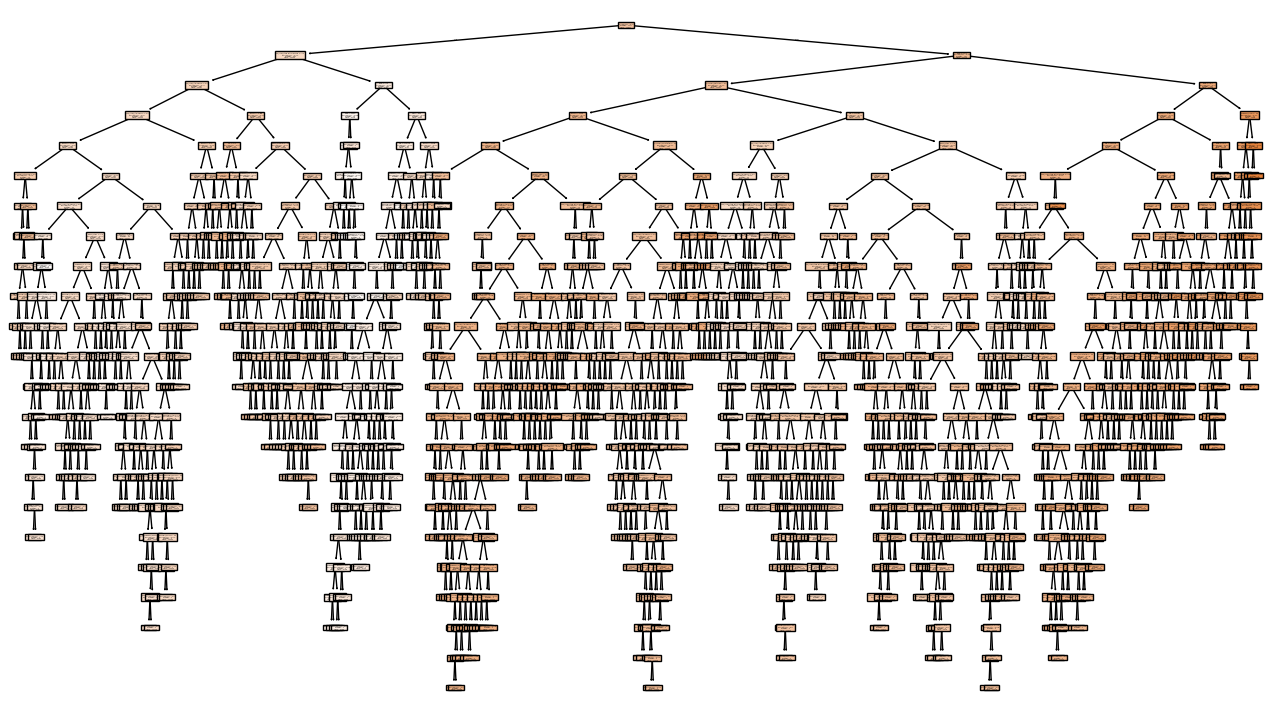

In [146]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [148]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [149]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

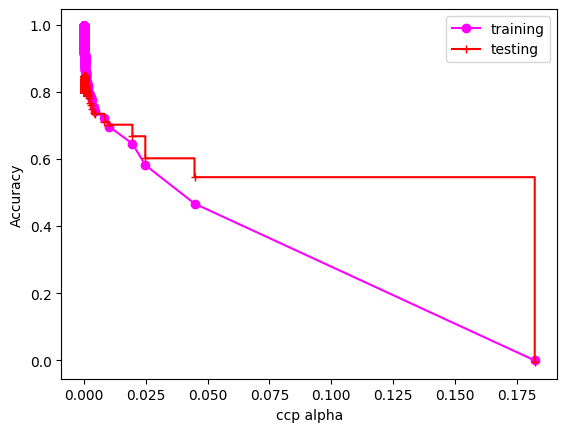

In [150]:
train_score = [reg.score(X_train,y_train) for reg in alphalist]
test_score = [reg.score(X_test,y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
         label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

**possible values of alpha can lie between `[0.0025-->0.0075]`**

[Text(0.5, 0.9, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(0.25, 0.7, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'squared_error = 0.13\nsamples = 256\nvalue = 10.387'),
 Text(0.375, 0.5, 'squared_error = 0.084\nsamples = 106\nvalue = 9.781'),
 Text(0.75, 0.7, 'Ram <= 14.0\nsquared_error = 0.215\nsamples = 744\nvalue = 11.119'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'TypeName_Notebook <= 0.5\nsquared_error = 0.159\nsamples = 553\nvalue = 10.967'),
 Text(0.5, 0.3, 'squared_error = 0.107\nsamples = 268\nvalue = 11.172'),
 Text(0.75, 0.3, 'PPI <= 114.881\nsquared_error = 0.131\nsamples = 285\nvalue = 10.775'),
 Text(0.625, 0.1, 'squared_error = 0.072\nsamples = 59\nvalue = 10.384'),
 Text(0.875, 0.1, 'squared_error = 0.096\nsamples = 226\nvalue = 10.877'),
 Text(0.875, 0.5, 'squared_error = 0.12\nsamples = 191\nvalue = 11.558')]

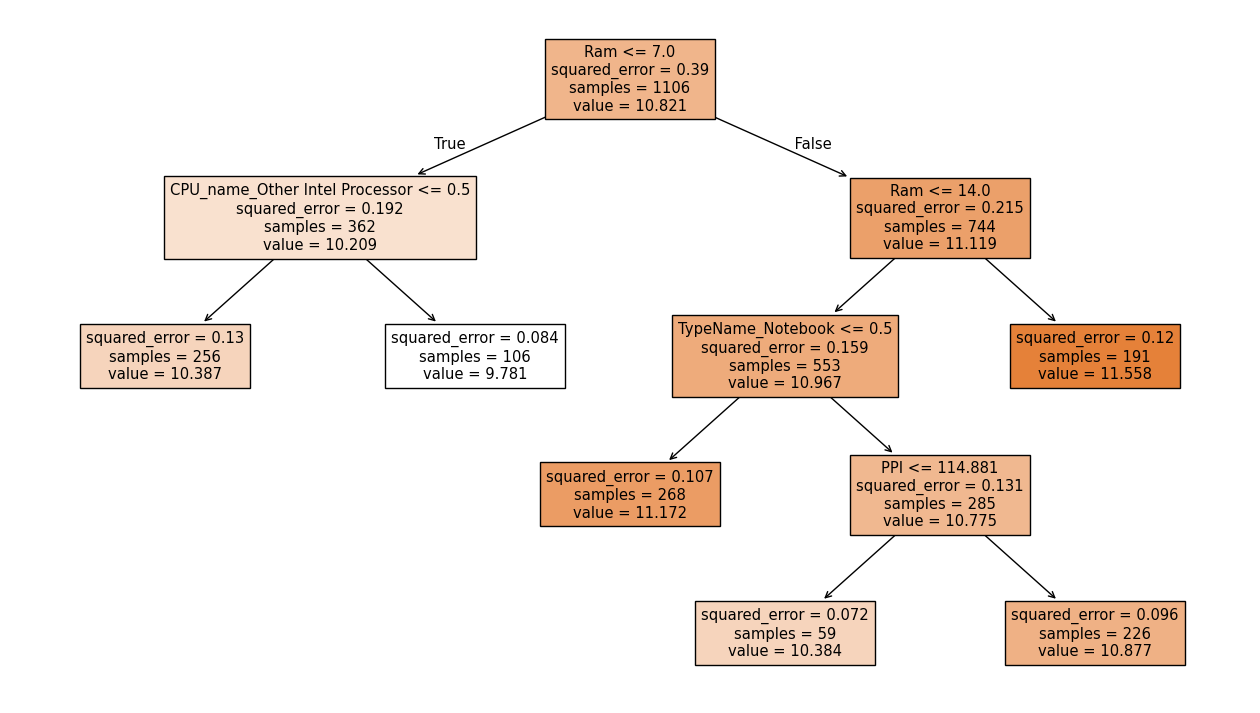

In [151]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [152]:
params=  {

    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [154]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Example params dictionary with models and hyperparameters
params = {
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [10, 15, 20],
            'min_samples_split': [2, 4, 6]
        }
    }
}

# List to store results
scores = []

# Iterate over each model in the params dictionary
for modelname, mp in params.items():
    # Create RandomizedSearchCV object
    clf = RandomizedSearchCV(mp['model'],
                             param_distributions=mp['params'],
                             cv=5,
                             n_iter=10,
                             scoring='neg_mean_squared_error',
                             verbose=2)
    # Fit the model on training data
    clf.fit(X_train, y_train)

    # Append the results to the scores list
    scores.append({
        'model_name': modelname,
        'best_score': clf.best_score_,
        'best_estimator': clf.best_estimator_
    })

# Print the results
for score in scores:
    print(f"Model: {score['model_name']}")
    print(f"Best Score: {score['best_score']}")
    print(f"Best Estimator: {score['best_estimator']}")
    print('-' * 50)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=30, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END max_depth=30, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END max_depth=30, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=30, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END max_depth=20, min_samples_split=5, n_estimators=200; total time=   2.0s
[CV] END max_depth=20, min_samples_split=5, n_estimators=200; total time=   2.8s
[CV] END max_depth=20, min_samples_split=5, n_estimators=200; total time=   3.3s
[CV] END max_depth=20, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=30, min_samples_split=2, n_estimators=300; total time=   1.6s
[CV] END max_depth=30, min_samples_split=2, n_es

In [155]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.049194,"(DecisionTreeRegressor(max_depth=30, max_featu..."
1,DecisionTree,-0.073869,"DecisionTreeRegressor(max_depth=10, min_sample..."


In [156]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.04919427188458087,
  'best_estimator': RandomForestRegressor(max_depth=30, n_estimators=200)},
 {'model_name': 'DecisionTree',
  'best_score': -0.07386898834677774,
  'best_estimator': DecisionTreeRegressor(max_depth=10, min_samples_split=4)}]

In [157]:
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

0.8847467080934129


## Prediction on the whole Dataset

In [158]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))

predicted

[array([11.24294811]),
 array([11.17541366]),
 array([10.80464562]),
 array([11.56843105]),
 array([11.26233153]),
 array([10.21123392]),
 array([11.56110366]),
 array([11.17541366]),
 array([11.51708667]),
 array([11.03061717]),
 array([10.47745961]),
 array([10.20655918]),
 array([11.5668194]),
 array([10.22683035]),
 array([11.26272455]),
 array([11.26233153]),
 array([10.90515293]),
 array([11.56843105]),
 array([10.69879455]),
 array([11.20980473]),
 array([9.77996127]),
 array([10.98931423]),
 array([10.19174488]),
 array([11.03061717]),
 array([11.08854563]),
 array([10.21179069]),
 array([11.17541366]),
 array([10.88554405]),
 array([11.08279416]),
 array([10.79374561]),
 array([9.7827353]),
 array([10.34976761]),
 array([10.22576865]),
 array([11.56731553]),
 array([11.17541366]),
 array([9.7827353]),
 array([10.19230164]),
 array([10.91974228]),
 array([10.5016407]),
 array([10.88720992]),
 array([10.20655918]),
 array([11.43386876]),
 array([10.386467]),
 array([10.50139288]

In [159]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [160]:
data['Predicted Price'] = np.array(ans)
data

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,76339.678267
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,71354.354877
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,49249.063123
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,105707.492524
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,77833.836651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,31615.355047
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,105589.639303
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,17675.968204
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,28833.303304


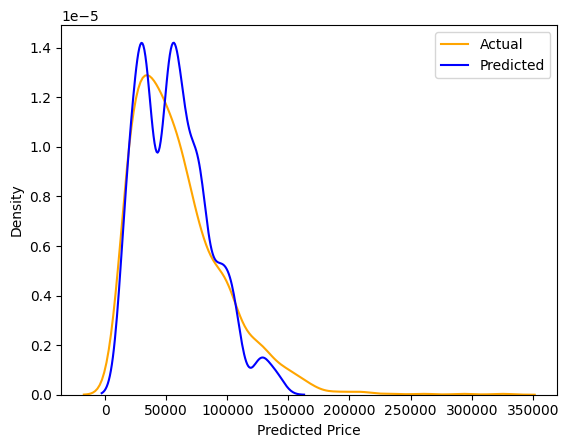

In [161]:
sns.distplot(data['Price'],hist=False,color='orange',label='Actual')
sns.distplot(data['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

# Random Forest Regressor version_2

In [162]:
rf1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

rf1.fit(X_train,y_train)
print(f'R2 score : {metrics.r2_score(y_test,rf1.predict(X_test))}')

R2 score : 0.8876128191160725


In [163]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf1.predict([testtrain[i]]))

predicted

[array([11.20784509]),
 array([10.88950558]),
 array([10.56778485]),
 array([11.81836793]),
 array([11.33551353]),
 array([9.90517367]),
 array([11.50111647]),
 array([10.88950558]),
 array([11.41766596]),
 array([10.79294499]),
 array([10.21615337]),
 array([9.94510976]),
 array([11.76381815]),
 array([10.27666635]),
 array([11.19124676]),
 array([11.33551353]),
 array([10.73698886]),
 array([11.81836793]),
 array([10.31178534]),
 array([11.05516197]),
 array([9.48342539]),
 array([10.87999561]),
 array([9.7312888]),
 array([10.81500673]),
 array([10.85382199]),
 array([10.08137644]),
 array([10.91987547]),
 array([10.67345463]),
 array([11.18930775]),
 array([10.75609049]),
 array([9.62641465]),
 array([9.92493055]),
 array([10.14641634]),
 array([11.64505354]),
 array([10.91987547]),
 array([9.60954191]),
 array([9.93779062]),
 array([10.88595584]),
 array([10.33791778]),
 array([10.76774898]),
 array([10.0170042]),
 array([11.27649887]),
 array([10.357987]),
 array([10.53152572]),


In [164]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [166]:
data = data.copy()
data['Predicted Price'] = np.array(ans)
data

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,73706.412771
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,53610.787368
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,38862.492221
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,135722.538833
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,83743.474209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,36457.409553
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,87057.089684
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,12812.674177
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,37514.342788


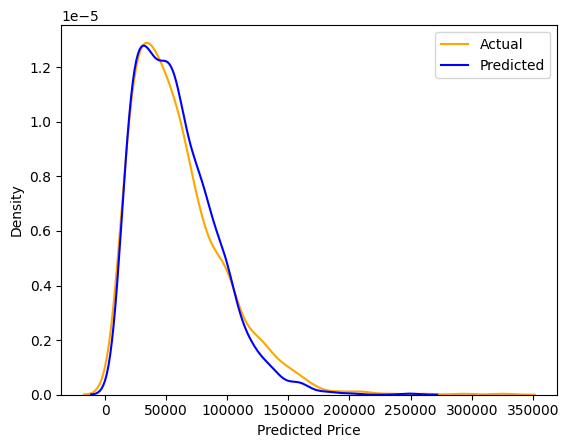

In [167]:
sns.distplot(data['Price'],hist=False,color='orange',label='Actual')
sns.distplot(data['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [168]:
import pickle
file = open('laptoppricepredictor.pkl','wb')
pickle.dump(rf1,file)
file.close()

In [169]:
X_train.iloc[0]

,183
Ram,8
Weight,2.0
TouchScreen,0
IPS,0
PPI,100.45467
HDD,0
SSD,128
Company_Apple,False
Company_Asus,False
Company_Chuwi,False
